# 2021- 5A-IBD - Unsupervised Machine Learning 

# Librairies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rc
import seaborn as sns
from ggplot import *
%matplotlib inline


# Load MNIST Digits

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

<Figure size 432x288 with 0 Axes>

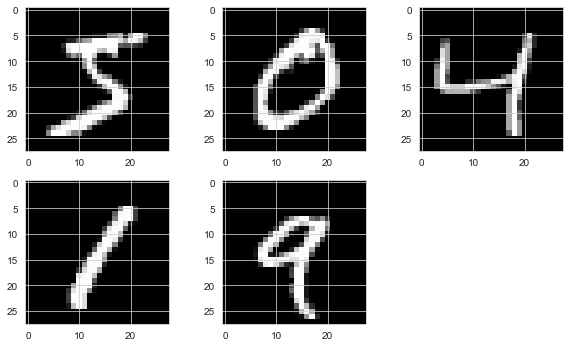

In [61]:
x_train = x_train/255.0
# Plot image data from x_train
plt.gray()
plt.figure(figsize = (10,9))

for i in range(5):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])

In [9]:
X_train = x_train.reshape(len(x_train),-1)
print("Dimension X_train : ",X_train.shape)

Dimension X_train :  (60000, 784)


# Partie 1 : K-Means

In [10]:
#Choisir un échantillon aléatoire d'une liste X pour générer les centres de gravité initiaux
def random_sample(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False),:]

#Centrer les centres de gravité les plus proches au point y, X = centroïde
def pairwise_distances_argmin(X, y):
    indices = np.empty(X.shape[0], dtype=np.intp)
    for i in range(len(X)):
        indices[i] = np.linalg.norm(X[i,np.newaxis] - y, axis=1).argmin()
    return indices

In [11]:
#Une iteration d'algorithme Lloyd
def kmeans_iteration(X, m,distance=pairwise_distances_argmin):
    clusters = distance(X, m)
    centroids = np.empty(m.shape)
    for i in range(len(m)):
        centroids[i] = np.mean(X[clusters == i], axis=0)
    return centroids, clusters

#Exécutez K_means jusqu'à la convergence
def kmeans(X, k,m=None,distance=pairwise_distances_argmin):
    if m is None : m = random_sample(X, k)
    while True:
        new_m, clusters = kmeans_iteration(X, m,distance)
        if np.isclose(m, new_m).all():
            break
        m = new_m
    return new_m, clusters

In [13]:
plt.style.use('ggplot')
sns.set_style('whitegrid') 
rc('figure', figsize=(6, 4))
cmap = cm.get_cmap('rainbow')

def plot_clusters(X, m, clusters):
    k = len(m)
    for i in range(k):
        group = X[clusters == i]
        plt.scatter(group[:,0], group[:,1], marker='.', color=cmap(i / k))
        plt.scatter(m[i,0], m[i,1], marker='s',lw=2,color=cmap(i / k),edgecolor='k')
    plt.show()


## 1.2 K-Means : Train


In [101]:
k=10
X=X_train
#Lancer le kmeans
centroids, clusters = kmeans(X, k)


## 1.3 K-Means : Affichage

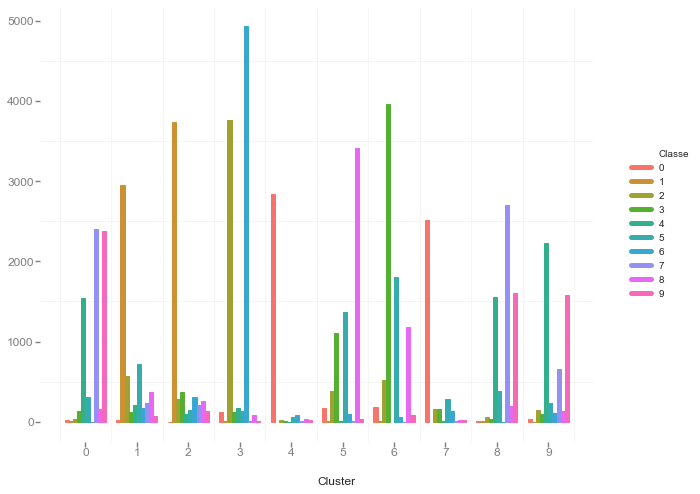

<ggplot: (104054819175)>

In [102]:
d = {'Cluster':list(clusters),'Classe':list(y_train)}
dfs = pd.DataFrame(d)
dfsx=dfs.groupby(["Cluster", "Classe"]).size().reset_index(name="Time")
dfsx.Classe= dfsx.Classe.apply(str)
ggplot(dfsx, aes(x='Cluster', weight='Time', fill='Classe')) + geom_bar() + theme_bw()

IndexError: index 5 is out of bounds for axis 0 with size 5

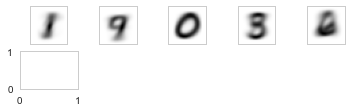

In [104]:
def display_digit(centroids):
    for i in range(len((centroids))):
        plt.subplot(5,5,i+1)
        image=m[i]
        fig = plt.imshow(image.reshape(28,28))
        fig.set_cmap('gray_r')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)

# Afficher les centroide générées par k-means
display_digit(centroids)

In [98]:
## Best K

In [99]:
k=16
X=X_train
#Lancer le kmeans
centroids, clusters = kmeans(X, k)


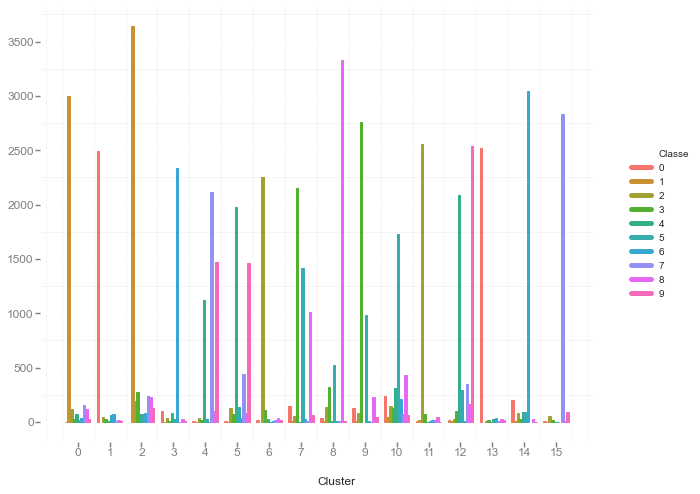

<ggplot: (104054392074)>

In [100]:
d = {'Cluster':list(clusters),'Classe':list(y_train)}
dfs = pd.DataFrame(d)
dfsx=dfs.groupby(["Cluster", "Classe"]).size().reset_index(name="Time")
dfsx.Classe= dfsx.Classe.apply(str)
ggplot(dfsx, aes(x='Cluster', weight='Time', fill='Classe')) + geom_bar() + theme_bw()